DQLab Telco is a telecommunications company with many branches spread across various locations. Since its establishment in 2019, DQLab Telco has consistently focused on enhancing its customer experience to ensure customers remain loyal.

Although the company is just over a year old, many customers have already switched to competitors. The management aims to reduce customer churn by applying machine learning techniques.

After preparing and cleaning the data in the previous step, it is now time to build an appropriate model to predict customer churn.

In this task, you will perform Machine Learning Modeling using data from last month, June 2020.

The steps to be carried out are:

Conduct Exploratory Data Analysis (EDA)

Perform Data Pre-Processing

Build the Machine Learning Model

Determine the Best Model

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [21]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv') 
print(df_load.shape)

(6950, 13)


In [22]:
print(df_load.head())

   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No  
2   Yes 

In [23]:
print(df_load.customerID.nunique())

6950


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


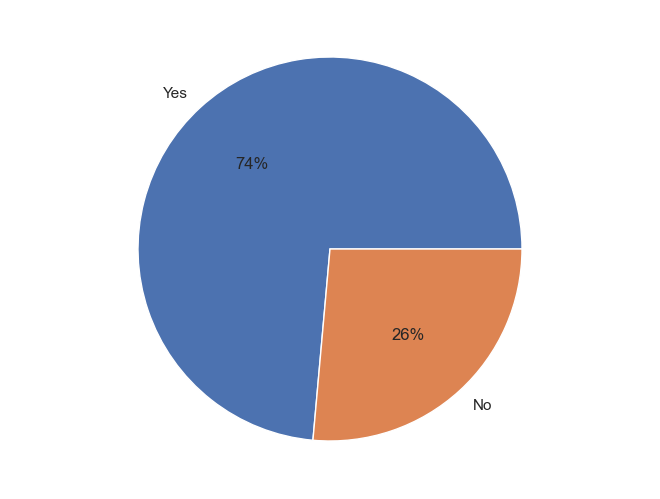

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
labels=['Yes','No']
churn=df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()


Exploratory Data Analysis : Numeric Variable

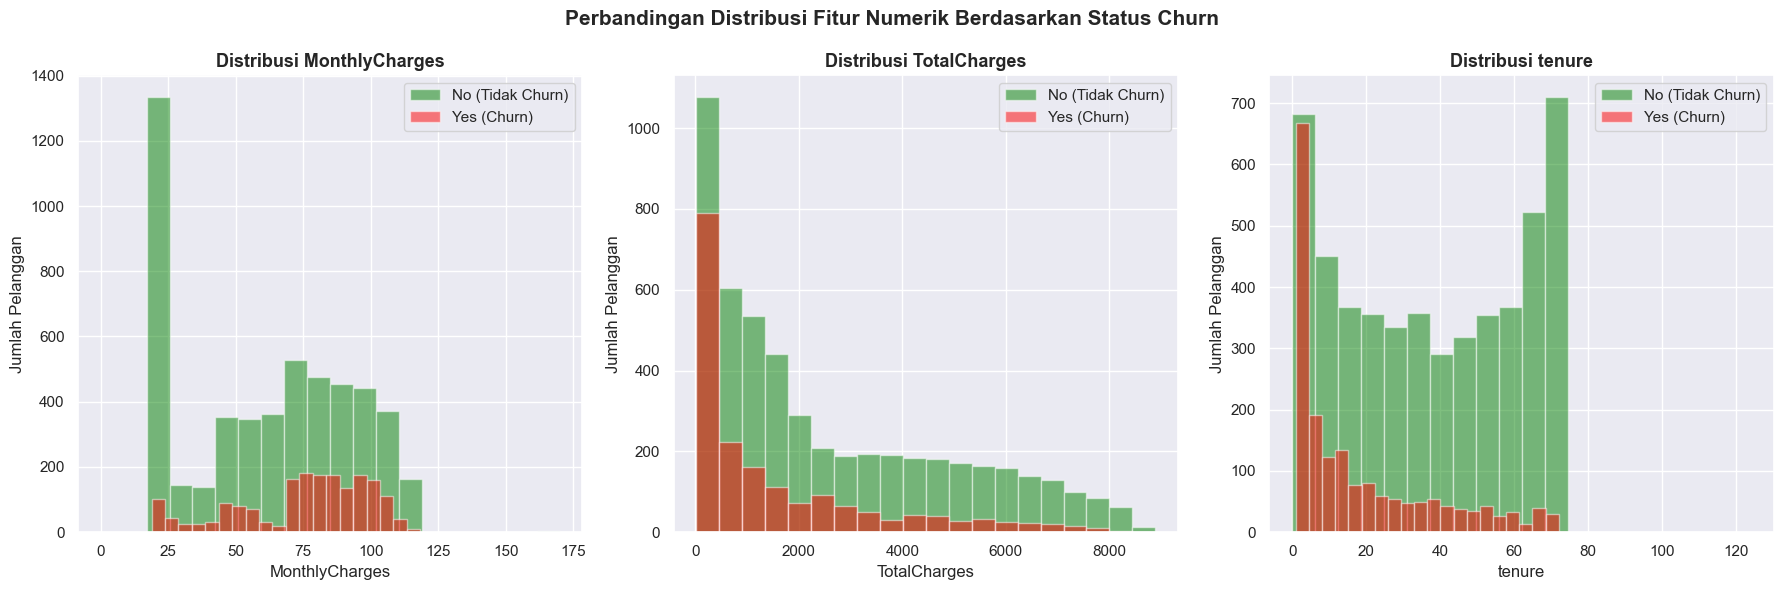

In [55]:
# Creating bin in chart
numerical_features=['MonthlyCharges','TotalCharges','tenure']
fig, ax=plt.subplots(1,3,figsize=(18,6))

# Loop setiap fitur untuk membuat histogram per kolom
for i, feature in enumerate(numerical_features):
# Histogram pelanggan tidak churn
    ax[i].hist(df_load[df_load['Churn'] == 'No'][feature],
               bins=20, color='green', alpha=0.5, label='No (Tidak Churn)')
    
    # Histogram pelanggan churn
    ax[i].hist(df_load[df_load['Churn'] == 'Yes'][feature],
               bins=20, color='red', alpha=0.5, label='Yes (Churn)')
# Tambahkan judul dan label
    ax[i].set_title(f'Distribusi {feature}', fontsize=13, fontweight='bold')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Jumlah Pelanggan')
    ax[i].legend()

# Tambahkan judul utama
plt.suptitle('Perbandingan Distribusi Fitur Numerik Berdasarkan Status Churn', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

Conclusions:

💡 Customers with high monthly charges tend to churn (cancel their subscription) more easily.
Meanwhile, those who pay lower monthly fees are more likely to remain loyal.

💡 New customers or those with low total charges are at a higher risk of churn, while customers who have been subscribed longer (with higher total charges) tend to stay.

💡 The longer a customer has been subscribed, the less likely they are to churn.
In contrast, new customers (with shorter tenure) are more likely to leave.

In [ ]:
sns.set(style='darkgrid')
fig, ax=plt.subplots(3,3,figsize=(14,12))
sns.countplot(data=df_load, x='Gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

Conclusion
Based on the results and analysis above, the following conclusions can be drawn:

In step C.1, we can see that the overall data distribution shows that most customers did not churn, with 26% Churn and 74% No Churn.

In step C.2, we can observe that for MonthlyCharges, the lower the monthly fee, the lower the likelihood of churn. For TotalCharges, there is no clear pattern or relationship with customer churn. For Tenure, the longer a customer has subscribed, the lower their tendency to churn.

In step C.3, we can see that there is no significant difference in churn behavior based on gender or phone service. However, there is a noticeable trend that customers who are more likely to churn are those who:

Do not have a partner (Partner: No)

Are senior citizens (SeniorCitizen: Yes)

Have streaming TV services (StreamingTV: Yes)

Have internet service (InternetService: Yes)

Use paperless billing (PaperlessBilling: Yes)

In [ ]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())


   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


In [ ]:

#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())



            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942      674.783597   
std       0.486468         0.411921          0.491509      473.599052   
min       0.00

In [ ]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Total of rows and columns from x_train is :', x_train.shape,', whereas Total of rows and columns from y_train is:', y_train.shape)
print('The percentage of Churn in the training data is:')
print(y_train.value_counts(normalize=True))
print('Total of rows and columns from x_test is:', x_test.shape,', whereas Total of rows and columns from y_test is:', y_test.shape)
print('The percentage of Churn in the test data is:')
print(y_test.value_counts(normalize=True))


Total of rows and columns from x_train is : (4865, 10) , whereas Total of rows and columns from y_train is: (4865,)
The percentage of Churn in the training data is:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Total of rows and columns from x_test is: (2085, 10) , whereas Total of rows and columns from y_test is: (2085,)
The percentage of Churn in the test data is:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


Conclusion

After further analysis, it was found that there are columns not needed in the model — namely the customer ID (customerID) and the data collection period (UpdatedAt) — so these need to be removed.

Next, we converted the string values into numeric form through encoding. After doing so, the data distribution, especially the minimum and maximum values of each variable, changed to 0 and 1.

The final step was to split the data into two parts for modeling purposes. After the split, the number of rows and columns in each dataset matched correctly, and the percentage of the churn column remained the same as in the original data. This indicates that the data was properly and accurately separated.

In [29]:
# Label Encoding untuk kolom kategori
for column in cleaned_df.columns:
    if not np.issubdtype(cleaned_df[column].dtype, np.number):
        cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

# Pisahkan fitur dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Latih model Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train, y_train)

print('Model Logistic Regression yang terbentuk adalah:\n', log_model)

Model Logistic Regression yang terbentuk adalah:
 LogisticRegression(max_iter=500)


In [30]:
# Label Encoding untuk kolom kategori
for column in cleaned_df.columns:
    if np.issubdtype(cleaned_df[column].dtype, np.number):
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

# Pisahkan fitur dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Logistic Regression
log_model = LogisticRegression(max_iter=500).fit(x_train, y_train)

# Prediksi & evaluasi di data training
y_train_pred = log_model.predict(x_train)
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.67      0.48      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.75      0.70      0.71      4865
weighted avg       0.79      0.80      0.79      4865



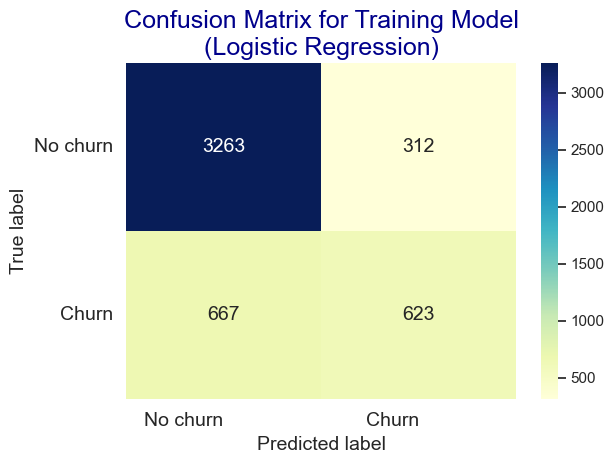

In [31]:

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


In [34]:
sns.set(style='darkgrid')
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.65      0.47      0.55       546

    accuracy                           0.80      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.80      0.78      2085



c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


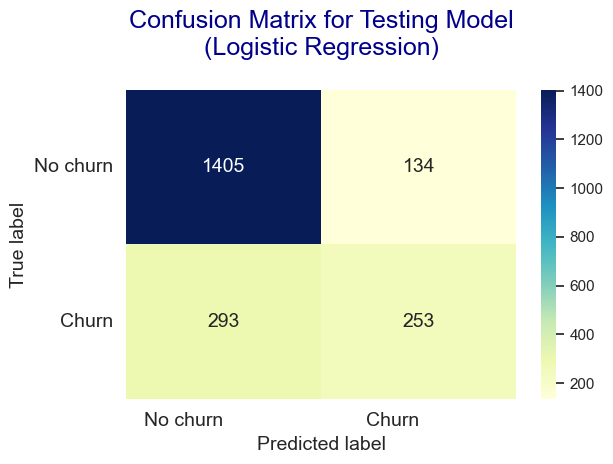

In [35]:
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression().fit(x_train, y_train)
y_test_pred = log_model.predict(x_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


Conclusion
Based on the results and analysis above:

When using the Logistic Regression algorithm by calling LogisticRegression() from scikit-learn without adding any parameters, the model produced uses scikit-learn’s default settings. Details of these settings can be found in the official documentation.

From the training data, the model was able to predict with an accuracy of 80%. Specifically, the model correctly predicted:

638 churn cases (true churn),

3,237 non-churn cases (true non-churn),

while it incorrectly predicted

652 churn cases as non-churn, and

338 non-churn cases as churn.

From the testing data, the model achieved an accuracy of 79%. Specifically, it correctly predicted:

264 churn cases (true churn),

1,392 non-churn cases (true non-churn),

while it incorrectly predicted

282 churn cases as non-churn, and

146 non-churn cases as churn.

In [37]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)


RandomForestClassifier()


In [38]:
rdf_model = RandomForestClassifier().fit(x_train, y_train)

y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



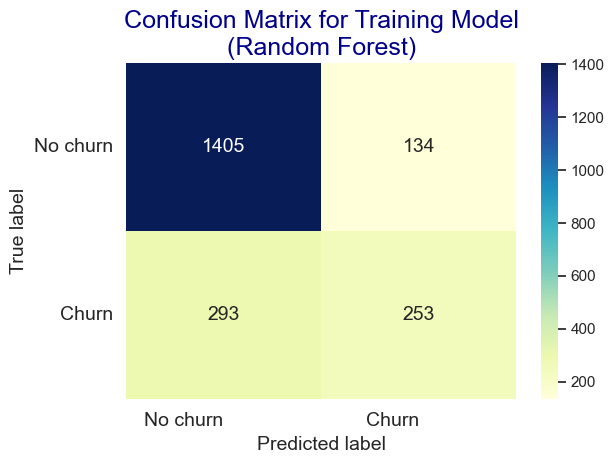

In [39]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


In [41]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



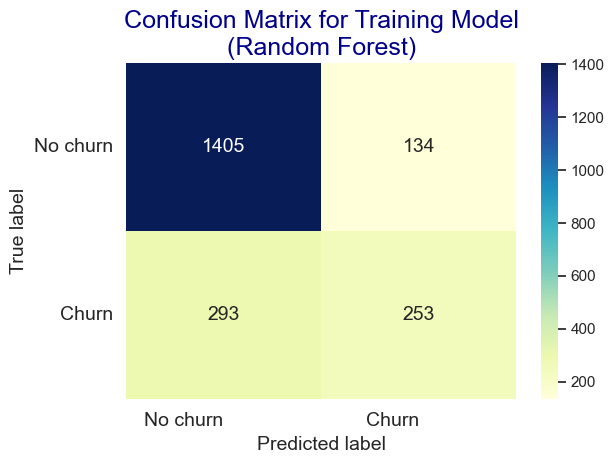

In [42]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


In [43]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.48      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



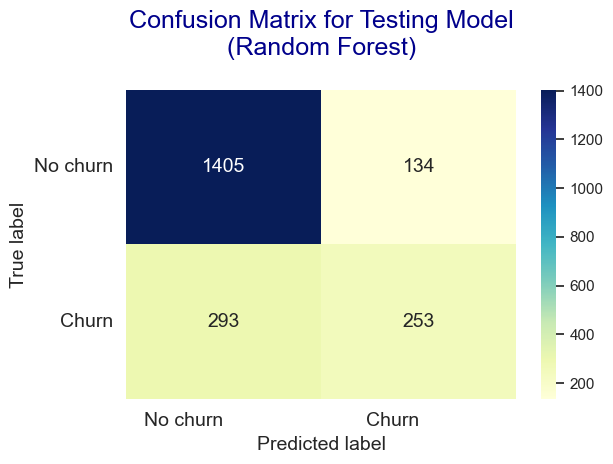

In [44]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Conclusion
Based on the results and analysis above:

When using the Random Forest algorithm by calling RandomForestClassifier() from scikit-learn without adding any parameters, the model produced uses scikit-learn’s default settings. Details of these settings can be found in the official documentation.

From the training data, the model was able to predict with an accuracy of 100%. Specifically, it correctly predicted:

1,278 churn cases (true churn),

3,566 non-churn cases (true non-churn),

while it incorrectly predicted

12 churn cases as non-churn, and

9 non-churn cases as churn.

From the testing data, the model achieved an accuracy of 78%. Specifically, it correctly predicted:

262 churn cases (true churn),

1,360 non-churn cases (true non-churn),

while it incorrectly predicted

284 churn cases as non-churn, and

179 non-churn cases as churn.


In [45]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)


GradientBoostingClassifier()


In [46]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



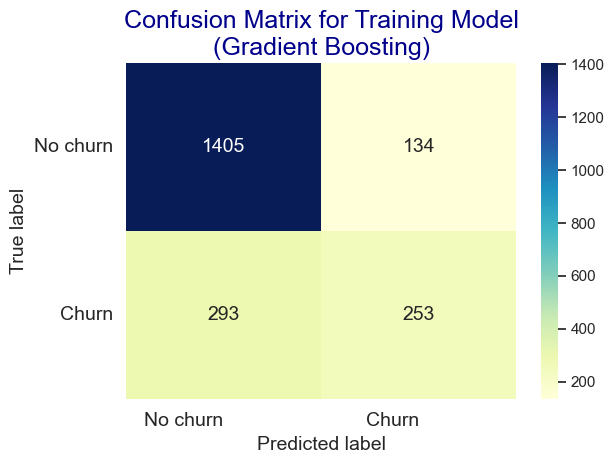

In [47]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


In [48]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



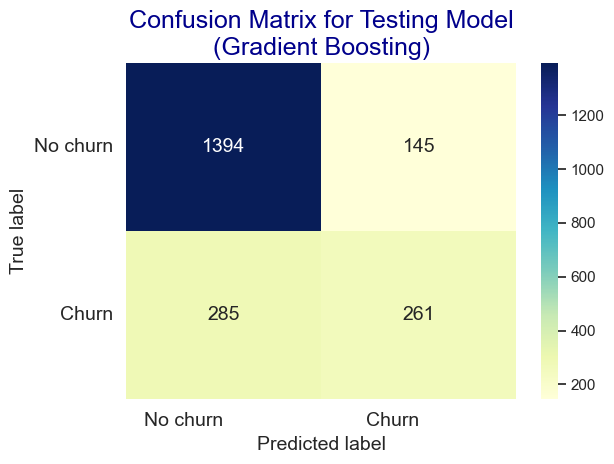

In [49]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


Conclusion
Based on the results and analysis above:

When using the Gradient Boosting algorithm by calling GradientBoostingClassifier() from the scikit-learn package without adding any parameters, the model produced uses scikit-learn’s default settings. Details of these settings can be found in the official documentation.

From the training data, the model was able to predict with an accuracy of 82%. Specifically, it correctly predicted:

684 churn cases (true churn),

3,286 non-churn cases (true non-churn),

while it incorrectly predicted

606 churn cases as non-churn, and

289 non-churn cases as churn.

From the testing data, the model achieved an accuracy of 79%. Specifically, it correctly predicted:

261 churn cases (true churn),

1,394 non-churn cases (true non-churn),

while it incorrectly predicted

285 churn cases as non-churn, and

145 non-churn cases as churn.

In [50]:
#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))


In [52]:
# Encode categorical columns
for column in cleaned_df.columns:
    if np.issubdtype(cleaned_df[column].dtype, np.number):
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

# Split data
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=200).fit(x_train, y_train)

# Print model summary
print("Model Logistic Regression yang terbentuk adalah:\n", log_model)

Model Logistic Regression yang terbentuk adalah:
 LogisticRegression(max_iter=200)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Conclusion
Based on the modeling conducted using Logistic Regression, Random Forest, and Extreme Gradient Boosting, it can be concluded that for predicting customer churn in this Telco dataset, the best-performing model is Logistic Regression.

This is because the Logistic Regression model demonstrates consistent performance in both the training and testing phases (training accuracy of 80% and testing accuracy of 79%). In contrast, the other algorithms tend to show overfitting behavior.

However, this does not imply that Logistic Regression will always be the best model for any prediction task. It is still essential to experiment with multiple models to determine which one performs best for each specific case.